In [2]:
# In questa prima cella si importano anche le librerie necessarie:
import numpy as np
from scipy import optimize as sop
from matplotlib.ticker import EngFormatter
import matplotlib.pyplot as plt
import pandas as pd

#Altri dati utili per i plot
titlefontsize, labelfontsize, tickfontsize=20, 16, 14
markersize, linewidth = 6, 1.5

# Caratterizzazione di un SiPM
## Generalità sui SiPM
SiPM sta per Silicon PhotoMultiplier ed è costituito da una matrice di micro foto-diodi collegati in parallelo. Funge da sempice fotomoltiplicatore perché, quando viene rilevato un fotone in una cella (in uno dei fotodiodi della matrice), si genera una fotocorrente data dalla produzione di una valanga di coppie elettrone buca; notare però che il diodo si accende soltanto se la tensione di alimentazione supera un certo valore (la *tensione di Breakdown*).

I SiPM hanno un rumore intrinseco:
* a seconda della temperatura, c'è una probabilità più o meno grande che una cella si accenda a causa degli effetti termici, generando una fotocorrente: in questo caso si parla di segnale di singola cella;
* c'è una probabilità non nulla che un fotone prodotto durante una valanga entri in una cella adiacente, generando quindi un altro segnale di conteggio: questo è il fenomeno dell'*optical crosstalk* e il segnale generato è più grande (in valore assoluto), dato che è equivalente all'accensione di due celle; si parla in questo caso di segnale di doppia cella.


## Obiettivi dell'esperienza
Quest'esperienza presenta due obiettivi principali:
* costuire la caratteristica $I-V$ del SiPM, misurando anche la corrente di breakdown
* valutare il rumore intrinseco del SiPM, osservando sull'oscilloscopio anche il fenomeno dell'optical crosstalk.


## Struttura dell'esperimento
Di seguito è riportata la schematica del circuito utilizzato.
<br><center><img src="img/SiPM.png" /></center><br>

Il voltmetro sulla resistenza da $1\text{ M\Omega}$ serve per ricavare la fotocorrente: dato che $V = RI$ allora $I = V/R$, quindi, dato che la resistenza è $1\text{ M\Omega}$ il valore letto sul voltmetro corrisponderà alla corrente in $\text{{\mu}A}$. Questa lettura servirà per costruire la curva $I-V$: in questa fase si terrà l'oscilloscopio scollegato.
Nella seconda fase dell'esperienza, ovvero la valutazione del rumore intrinseco, si collega l'oscilloscopio ai capi della resistenza da $1\text{ k\Omega}$ e si osserva il segnale rilevato: alzando o abbassando la soglia di trigger si riescono ad isolare i segnali di singola cella da quelli di doppia cella.

## Dati e grafici
Nelle celle di codice seguenti si procede a leggere i dati e a fare i relativi grafici.

In [3]:
# In questa cella si leggono i dati raccolti per la curva I-V e la tensione di breakdown
data = pd.read_csv("data/SiPM_I-V_Curve.csv", delimiter=";")
print(data)

# I dati sono in Volt
V_alimentazione = data["V"].to_numpy()
# La corrente in micro_ampere, come detto sopra, è numericamente uguale alla tensione sulla resistenza perché la resistenza è da 1 MOhm
I = data["V_R"].to_numpy()

        V    V_R
0    0.00  0.000
1    1.00  0.000
2    2.00  0.000
3    3.00  0.000
4    4.00  0.000
5    5.00  0.000
6    6.00  0.000
7    7.00  0.000
8    8.00  0.000
9    9.00  0.000
10  10.00  0.000
11  11.00  0.000
12  12.00  0.000
13  13.00  0.000
14  14.00  0.000
15  15.00  0.000
16  16.00  0.000
17  17.00  0.000
18  18.00  0.000
19  19.00  0.000
20  20.00  0.000
21  21.00  0.000
22  22.00  0.000
23  23.00  0.000
24  24.00  0.000
25  24.50  0.000
26  25.00  0.002
27  25.25  0.008
28  25.50  0.019
29  25.75  0.032
30  26.00  0.046
31  26.25  0.068
32  26.50  0.084
33  26.75  0.116
34  27.00  0.135
35  27.25  0.176
36  27.50  0.202
37  27.75  0.244
38  28.00  0.278
39  28.25  0.326
40  28.50  0.368
41  28.75  0.429
42  29.00  0.472
43  29.25  0.545
44  29.50  0.622
45  29.75  0.680
46  30.00  0.762
47  30.25  0.807
48  30.50  0.918
49  30.75  0.977
50  31.00  1.105


In [4]:
# Definizione della funzione per il fit lineare
def linear(x, m, q):
    return m * x + q

# Funzione utile per il calcolo dell'R^2
def r_squared(actual, predicted):
    residuals = actual - predicted
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum( (actual - np.mean(actual))**2 )
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

Valore fittato per m= 0.164 deviazione standard= 0.00495
Valore fittato per q= -4.05 deviazione standard= 0.139
R^2 =  0.99916


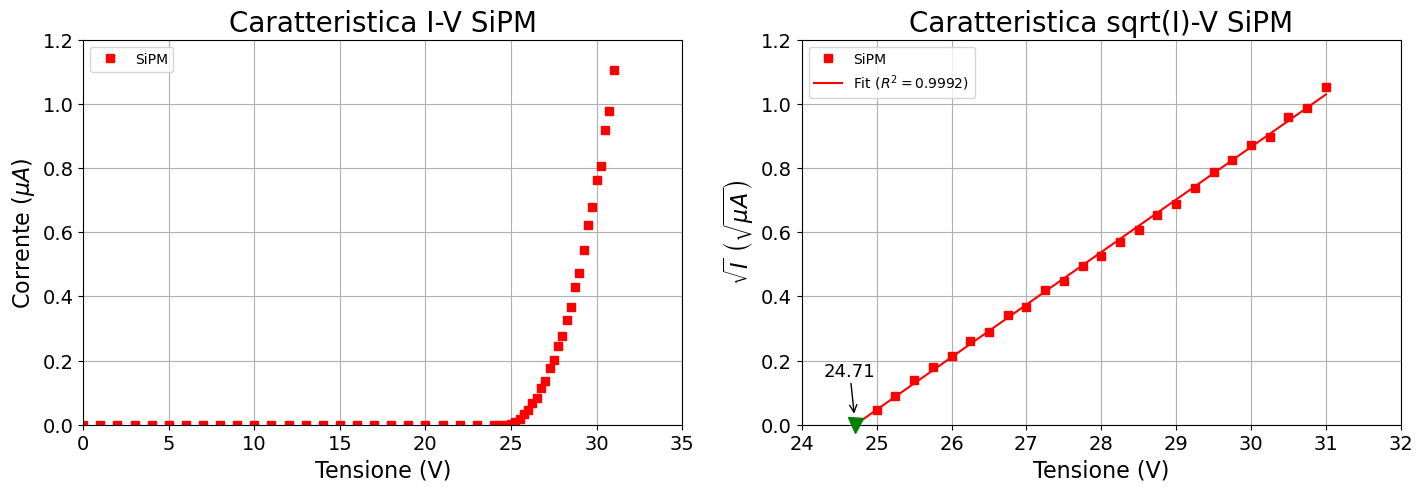

In [5]:
# Si procede ora al plot della curva I-V
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

# Nel primo plot si visualizza la curva normalmente
ax1.set_title('Caratteristica I-V SiPM', size=titlefontsize)
ax1.plot(V_alimentazione, I, 's', markersize=markersize, linewidth=linewidth, color='red', label="SiPM")
ax1.set_xlabel("Tensione (V)", fontsize=labelfontsize)
ax1.set_ylabel("Corrente (${\mu}A$)", fontsize=labelfontsize)
ax1.set_xlim(0,35)
ax1.set_ylim(0,1.2)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

# Nel secondo plot si visualizza la curva plottando sqrt(I) sull'asse Y con il relativo fit lineare
# Definizione dei bounds
m_min, m_max = -1, 1
q_min, q_max = -5, 5
min, max = [m_min, q_min], [m_max, q_max]
bounds = [min, max]

# Per isolare i dati da fittare, si ricava l'indice del primo dato maggiore di 0 nella fotocorrente
index = np.argmax(I > 0)
ndata = len(V_alimentazione[index:])          #numero di dati analizzati
# Si effettua ora il fit non lineare per i parametri n e theta_0
popt, pcov = sop.curve_fit(linear, V_alimentazione[index:], np.sqrt(I[index:]), bounds=bounds)
m = popt[0]
q = popt[1]

# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(np.sqrt(I[index:]), linear(V_alimentazione[index:], m, q))

print('Valore fittato per m=', "{:.3g}".format(m), 'deviazione standard=',"{:.3g}".format(sigma[0]))
print('Valore fittato per q=', "{:.3g}".format(q), 'deviazione standard=',"{:.3g}".format(sigma[1]))
print("R^2 = ", "{:.5g}".format(r_sq))

# Calcolo la tensione di breakdown (l'intercetta)
V_breakdown = -q/m

# Si fa ora il plot con la retta fittata
ax2.set_title('Caratteristica sqrt(I)-V SiPM', size=titlefontsize)
ax2.plot(V_alimentazione[index:], np.sqrt(I[index:]), 's', markersize=markersize, linewidth=linewidth, color='red', label="SiPM")
V_fit = np.linspace(q/m, V_alimentazione[-1], 1000)
ax2.plot(V_fit, linear(V_fit, m, q), '-', markersize=markersize, linewidth=linewidth, color='red', label="Fit ($R^2=${:.4f})".format(r_sq))
ax2.plot(V_breakdown, 0, 'v', markersize=1.8*markersize, linewidth=3*linewidth, color='green', zorder=10, clip_on=False)
ax2.annotate("{:.2f}".format(V_breakdown), (V_breakdown, 0), xytext =(V_breakdown-0.42, 0.15), arrowprops = dict(arrowstyle="->", shrinkA=0, shrinkB=8), fontsize=13)
ax2.set_xlabel("Tensione (V)", fontsize=labelfontsize)
ax2.set_ylabel("$\sqrt{I}\ \left(\sqrt{{\mu}A}\\right)$", fontsize=labelfontsize)
ax2.set_xlim(24,32)
ax2.set_ylim(0,1.2)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend();

Come evidenziato dal grafico precedente, la tensione di breakout ottenuta calcolando l'intercetta della retta fittata con l'asse x è: $V_B = 24.71 \text{ V}$

Nelle celle successive si riportano i dati raccolti per il rumore intrinseco. Si è proceduto nel seguente modo:
* si è ottenuta dapprima la tensione relativa al segnale di doppia cella perché più facile da isolare, ricavando quindi anche il segnale di singola cella;
* spostando la soglia di trigger a vari livelli rispetto al segnale di singola cella, si è misurata la frequenza. In particolare, se $V_{sing}$ è il segnale di singola cella, si è misurata la frequenza impostando il trigger ai seguenti scaglioni: $0.25 V_{sing}$,  $0.5 V_{sing}$,  $0.75 V_{sing}$,  $V_{sing}$,  $1.25 V_{sing}$,  $1.5 V_{sing}$,  $1.75 V_{sing}$,  $2 V_{sing}$

Si è usata questa procedura per capire a quale soglia fosse opportuno prendere la frequenza per il segnale di singola cella, senza catturare rumore. Si è scelta la soglia del $0.75 V_{sing}$ per i segnali di singola cella, mentre quella di $1.5 V_{sing}$ per la frequenza di quelli di doppia cella. Questa scelta è giustificata dal primo plot visualizzato sotto (che a titolo di esempio è quello con i $31 \text{ V}$ in alimentazione): i primi due punti ($0.25 V_{sing}$ e $0.5 V_{sing}$) prendono troppo rumore.
Dopo verrano visualizzati due plot con gli andamenti dei segnali di singola cella e di doppia cella. L'optical crosstalk non è stato calcolato a causa dell'eccessiva variabilità dei dati, che ha reso impossibile avere dei valori coerenti.

In [6]:
# In questa cella si leggono i dati raccolti per la curva I-V e la tensione di breakdown
data = pd.read_csv("data/SiPM_rumore.csv", delimiter=";")
# Si crea questo dizionario con i dati usando come chiavi i valori di tensione di alimentazione
data_dict = data.set_index('V').T.to_dict('list')

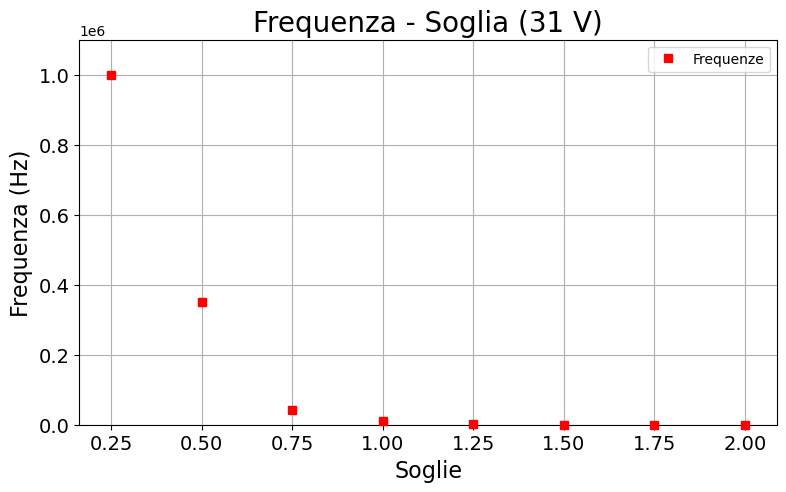

In [7]:
# Primo plot frequenze - soglia
fig, ax = plt.subplots(1, 1, figsize=[9,5])

ax.set_title('Frequenza - Soglia (31 V)', size=titlefontsize)
ax.plot(np.arange(0.25, 2.1, 0.25), data_dict[31.0][2:], 's', markersize=markersize, linewidth=linewidth, color='red', label="Frequenze", zorder=10, clip_on=False)
#ax.set_xlim(10,80)
ax.set_ylim(0,1100000)
ax.set_xlabel("Soglie", fontsize=labelfontsize)
ax.set_ylabel("Frequenza (Hz)", fontsize=labelfontsize)
ax.grid(True)
ax.tick_params(labelsize=tickfontsize)
ax.legend();

Come si può vedere, i primi due punti raccolgono tantissimo rumore, totalmente fuori scala rispetto a ciò che ci si aspetta di trovare. La soglia $0.75 V_{sing}$ cattura molto meno di quel rumore, rilevando però i segnali di singola soglia che interessa rilevare.
Di seguito si riporta un plot con l'andamento dei dati delle soglie $0.75 V_{sing}$ e $1.5 V_{sing}$ al variare del potenziale di alimentazione, vedendo quindi come variano i segnali di singola e doppia cella rispetto all'alimentazione.

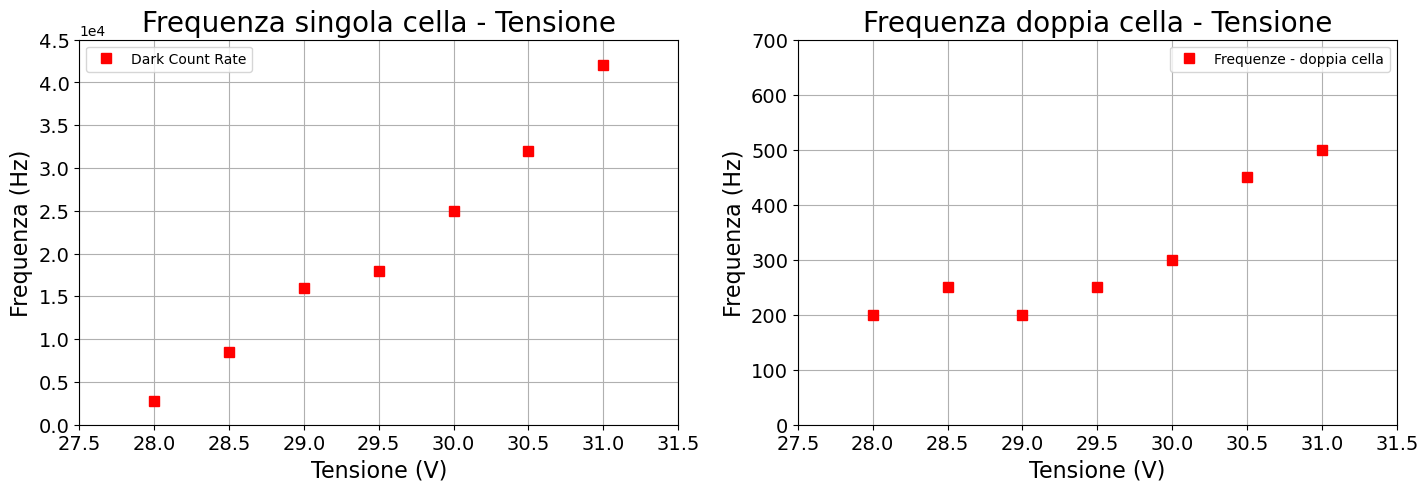

In [8]:
# Secondo plot frequenze singola cella - tensione
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

ax1.set_title('Frequenza singola cella - Tensione', size=titlefontsize)
ax1.plot(list(data_dict.keys()), [l[4] for l in list(data_dict.values())], 's', markersize=markersize*1.2, linewidth=linewidth, color='red', label="Dark Count Rate", zorder=10, clip_on=False)
ax1.set_xlim(27.5,31.5)
ax1.set_ylim(0,45000)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax1.set_xlabel("Tensione (V)", fontsize=labelfontsize)
ax1.set_ylabel("Frequenza (Hz)", fontsize=labelfontsize)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

ax2.set_title('Frequenza doppia cella - Tensione', size=titlefontsize)
ax2.plot(list(data_dict.keys()), [l[7] for l in list(data_dict.values())], 's', markersize=markersize*1.2, linewidth=linewidth, color='red', label="Frequenze - doppia cella", zorder=10, clip_on=False)
ax2.set_xlim(27.5,31.5)
ax2.set_ylim(0,700)
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax2.set_xlabel("Tensione (V)", fontsize=labelfontsize)
ax2.set_ylabel("Frequenza (Hz)", fontsize=labelfontsize)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend();

Come si può notare, gli andamenti sono quelli che ci si aspettano (crescita dei conteggi all'aumentare della tensione), ma la rapidità di crescita dei segnali di doppia cella è minore (quindi l'opticall crosstalk non crescerebbe, al contrario di come dovrebbe essere). Il motivo principale dietro questa incertezza sta nel fatto che la frequenza risultava estremamente variabile in fase di misura, quindi individuare il valore corretto si è rivelato particolarmente arduo, con alta probabilità di introdurre un errore non trascurabile.

# Rivelatore di Raggi Cosmici
## Obiettivi dell'esperienza
L'obiettivo principare di questa esperienza consiste nel riuscire a misurare il flusso di raggi cosmici in funzione dell'angolo zenitale. Per questo scopo si sono impiegati due rivelatori composti da una lastra di scintillatore plastico letta da SiPM.
Notare che il valore del flusso che si misura corrisponde alla rivelazione di raggi cosmici secondari, prodotti dall'interazione dei raggi cosmici primari con l'atmosfera. Le particelle rivelate a terra di fatto sono solo muoni.

## Struttura dell'esperimento
I due rivelatori impiegati provengono dalla strumentazione del kit Educational CAEN "Cosmic Hunter"; esso contiene:
* due lastre di scintillatore plastico lette da SiPM;
* un modulo per la misura dei conteggi quando si misura in coincidenza;
* goniometro, struttura di supporto e chiavi a brugola necessari per il montaggio e l'inclinazione del sistema composto dai due rivelatori.

Di seguito si allega un'immagine del setup sperimentale.
<br><center><img src="img/muon_telescope.png" width="900"/></center><br>

Variando i valori dell'angolo zenitale $\theta$ si ottengono valori di conteggi diversi; si sa che la distrivuzione angolare attesa al suolo dovrebbe avere una forma del tipo:

$$\frac{\mathrm{d}N}{\mathrm{d}t\mathrm{d}A\mathrm{d}\Omega} \propto \cos^2\left(\theta\right)$$

Ci si aspetta quindi in generale un andamento proporzionale a $\cos^2(\theta)$. Per fare ciò si fitteranno i dati con la seguente formula:
$$R(\theta) = A\cos^B(\theta) + C$$
dove:
* $R(\theta)$ è il rate di conteggi (in $\text{Hz}$) in funzione dell'angolo zenitale;
* $A$, $B$, $C$ sono parametri di fit (ci si aspetta quindi un valore di $B$ vicino a $2$).

Di seguito le celle di codice per la lettura dei dati e per i fit.

In [9]:
# In questa cella si leggono i dati relativi ai conteggi in funzione dell'angolo zenitale
data = pd.read_csv("data/counts_angle.csv", delimiter=";")
print(data)

theta = data["theta"].to_numpy()
time = data["time"].to_numpy()          #Il tempo è misurato in secondi, sempre intorno ai 300
# Si vanno già a salvare i rate, dato che è l'unica cosa che interessa
tile_A = data["A"].to_numpy()/time           #La tile A è quella più bassa, infatti fa meno conteggi
tile_B = data["B"].to_numpy()/time
coincidence = data["A_B"].to_numpy()
# Si considera come errore per la coincidenza la radice dei conteggi sul tempo
error_coincidence = np.sqrt(coincidence)/time
# Si salva infine il rate
coincidence_rate = coincidence / time


    theta     A      B    A_B  time
0       0  9504  15457  165.0   301
1      10  8776  14148  149.0   305
2      20  7708  12524  133.0   300
3      30  7364  11976  109.0   300
4      40  6739  11140   85.0   300
5      45  6288  10122   73.0   300
6      50  6449  10523   58.0   299
7      60  6233   9963   43.0   300
8      70  6023   9556   30.0   302
9      80  5758   9212   15.0   301
10     90  5619   9291    6.5   300


In [10]:
# Definizione funzione di fit per i conteggi
def counts_rate_angle(theta, A, B, C):
    return A * (np.cos(theta)**B) + C

Valore fittato per A= 0.476 deviazione standard= 0.0502
Valore fittato per B= 2.5 deviazione standard= 0.673
Valore fittato per C= 0.0436 deviazione standard= 0.0399
R^2 =  0.99218


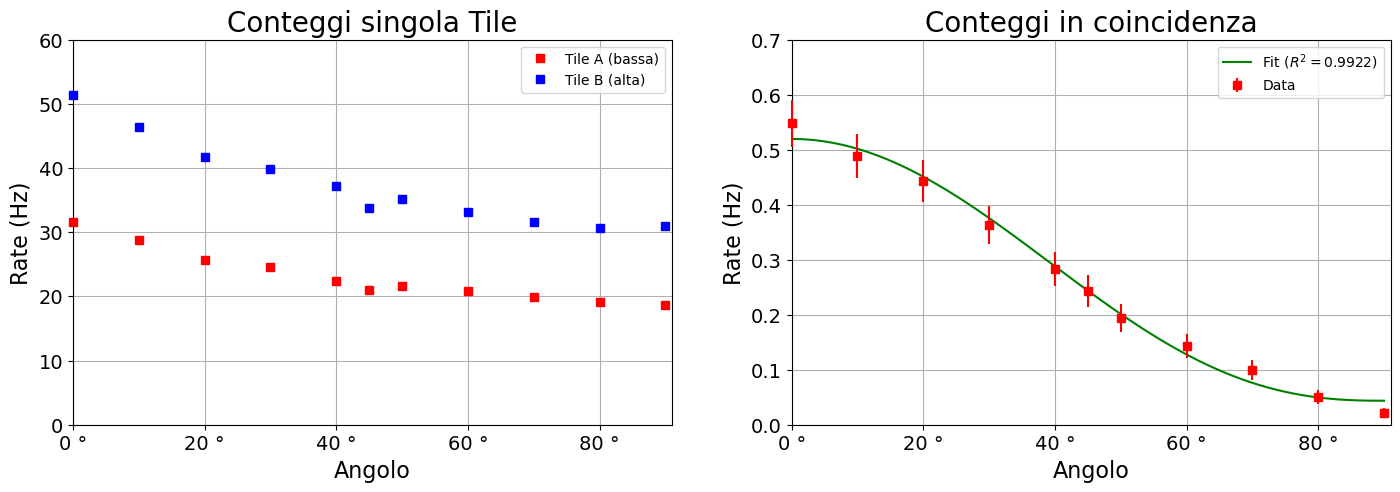

In [11]:
# Si procede ora al plot dei dati, sia dei conteggi delle singole tile sia dei conteggi in coincidenza (con relativo fit)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

# Singole tile
ax1.set_title('Conteggi singola Tile', size=titlefontsize)
ax1.plot(theta, tile_A, 's', markersize=markersize, linewidth=linewidth, color='red', label="Tile A (bassa)", zorder=10, clip_on=False)
ax1.plot(theta, tile_B, 's', markersize=markersize, linewidth=linewidth, color='blue', label="Tile B (alta)", zorder=10, clip_on=False)
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax1.set_xlabel("Angolo", fontsize=labelfontsize)
ax1.set_ylabel("Rate (Hz)", fontsize=labelfontsize)
ax1.set_xlim(0,91)
ax1.set_ylim(0,60)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

# Nel secondo plot si visualizzano i dati dei conteggi in coincidenza con il relativo fit
# Definizione dei bounds
m_min, m_max = -1, 1
q_min, q_max = -5, 5
min, max = [m_min, q_min], [m_max, q_max]
bounds = [min, max]
ndata = len(theta)          #numero di dati analizzati

# si crea l'array di dati in radianti essendo che il fit prevede quei valori dell'angolo
theta_rad = np.deg2rad(theta)



# Si effettua ora il fit non lineare per i parametri A, B e C
popt, pcov = sop.curve_fit(counts_rate_angle, theta_rad, coincidence_rate)
A = popt[0]
B = popt[1]
C = popt[2]

# Si calcola la deviazione standard e l'R^2
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(coincidence_rate, counts_rate_angle(theta_rad, A, B, C))

print('Valore fittato per A=', "{:.3g}".format(A), 'deviazione standard=',"{:.3g}".format(sigma[0]))
print('Valore fittato per B=', "{:.3g}".format(B), 'deviazione standard=',"{:.3g}".format(sigma[1]))
print('Valore fittato per C=', "{:.3g}".format(C), 'deviazione standard=',"{:.3g}".format(sigma[2]))
print("R^2 = ", "{:.5g}".format(r_sq))

# Si fa ora il plot con la curva fittata
ax2.set_title('Conteggi in coincidenza', size=titlefontsize)
ax2.errorbar(theta, coincidence_rate, yerr=error_coincidence, fmt='s', markersize=markersize, linewidth=linewidth, color='red', label="Data", zorder=10, clip_on=False)
theta_fit = np.linspace(theta_rad[0], theta_rad[-1], 1000)
ax2.plot(np.rad2deg(theta_fit), counts_rate_angle(theta_fit, A, B, C), '-', markersize=markersize, linewidth=linewidth, color='green', label="Fit ($R^2=${:.4f})".format(r_sq))
ax2.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax2.set_xlabel("Angolo", fontsize=labelfontsize)
ax2.set_ylabel("Rate (Hz)", fontsize=labelfontsize)
ax2.set_xlim(0,91)
ax2.set_ylim(0,0.7)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend();

Da questi plot si possono fare alcune osservazioni fondamentali:
* come ci si aspetta, sia nel caso delle tile singole, sia misurando in coincidenza, il numero di conteggi diminuisce con l'angolo;
* il rate delle singole tile è molto più alto di quello per i conteggi in coincidenza, come ci si aspetta, dato che la singola tile conta in tutte le direzionie non in una direzione precisa;
* la tile più in basso, come ci si aspetta, conta meno di quella più in alto
* i punti tra i $60\degree$ e gli $80\degree$ sono leggermente più in alto rispetto alla curva fittata: quando l'angolo aumenta, c'è una probabilità non nulla che vengano contati dei raggi molto inclinati provenienti dall'altra direzione, quindi che portano a una leggera sovrastima delle misure ad angoli alti; questo problema non è invece presente nella misura a $90\degree$ dato che, misurando in maniera simmetrica i raggi da entrambe le direzioni, è sufficiente dividere per 2 la misura dei conteggi ottenuta (nel file csv con i dati è stata già riportata la misura divisa).

Come errore per la visualizzazione delle barre d'errore nel secondo plot si è utilizzata la seguente relazione:
$$R_{err} = \frac{\sqrt{counts}}{time}$$

Dal fit si sono ottenuti i seguenti parametri:
$$A \approx \left(0.48 \pm 0.05\right) \mathrm{Hz} \hspace{4cm} B \approx 2.50 \pm 0.67 \hspace{4cm} C \approx \left(0.04 \pm 0.04\right) \mathrm{Hz}$$
Si nota che:
* su $B$ ci si aspettava un valore intorno a $2$, compreso quindi nell'intervallo di una deviazione standard dal valore di fit trovato. La deviazione standard risulta alta dato che la variazione dell'esponente fa variare poco la "curvatura" della curva di fit: unendo questo fatto alla grande variabilità data dalla natura intrinseca della misura stessa, si ha una grande incertezza sul parametro di fit trovato;
* anche il valore di $C$ presenta una grande deviazione standard: si nota però che, in questo caso, anche considerando il valore massimo dato da $C + \sigma_C$, l'impatto dell'offset sulla curva risulta $<0.1$, quindi minimo.

I risultati ottenuti sono quindi da considerarsi nel complesso soddisfacenti.

#### Andamento con l'altitudine
Di seguito si riportano i dati dei conteggi raccolti a diverse altezze: questa misura ha lo scopo di verificare l'aumento dei conteggi (quindi della dose ricevuta) con l'aumento dell'altitudine.
La misurazione è stata eseguita sempre in coincidenza, ma con le due tile appoggiate.

La misura dell'altezza è in metri rispetto al punto più basso dell'edificio del dipartimento in cui è stato possibile effettuare la misura.

In [12]:
# In questa cella si leggono i dati relativi ai conteggi in funzione dell'angolo zenitale
data = pd.read_csv("data/counts_height.csv", delimiter=";")
print(data)

height = data["height"].to_numpy()      # L'altezza è in metri
counts_height = data["counts"].to_numpy()
time_height = data["time"].to_numpy()       #Il tempo è misurato in secondi, sempre intorno ai 600
rate_height = counts_height / time_height   #Si calcola già anche il rate

   height  counts  time
0    15.7    1339   600
1     9.5    1074   600
2     0.3    1049   600


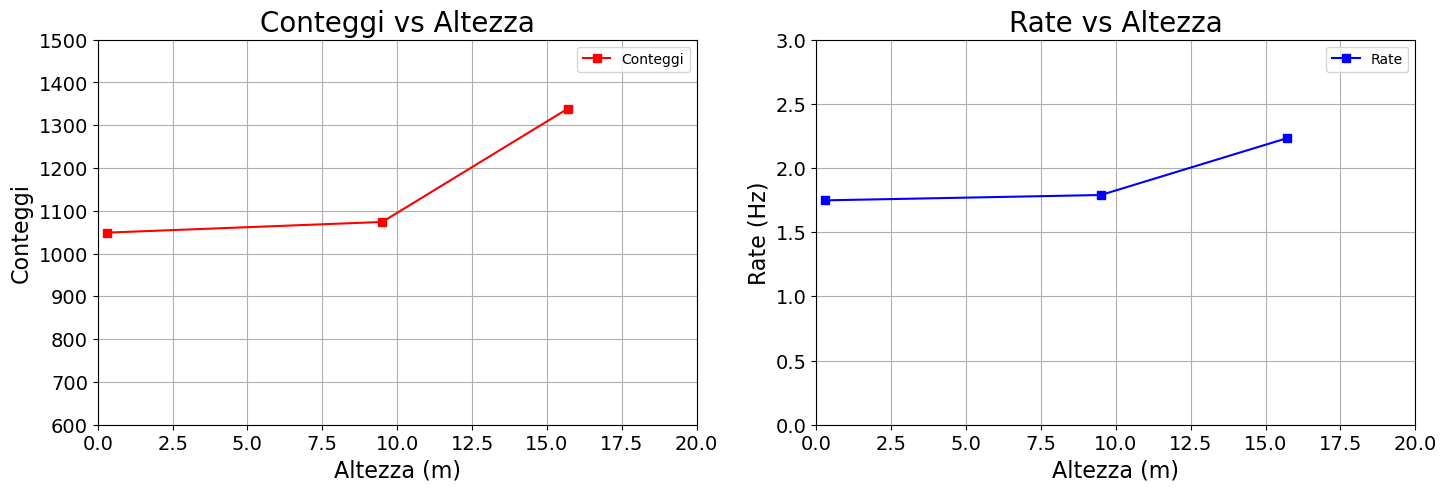

In [13]:
# Si procede ora al plot dei dati relativi all'altezza, sia per quanto riguarda i conteggi sia il rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

# Conteggi
ax1.set_title('Conteggi vs Altezza', size=titlefontsize)
ax1.plot(height, counts_height, 's-', markersize=markersize, linewidth=linewidth, color='red', label="Conteggi")
ax1.set_xlabel("Altezza (m)", fontsize=labelfontsize)
ax1.set_ylabel("Conteggi", fontsize=labelfontsize)
ax1.set_xlim(0,20)
ax1.set_ylim(600,1500)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

# Rate
ax2.set_title('Rate vs Altezza', size=titlefontsize)
ax2.plot(height, rate_height, 's-', markersize=markersize, linewidth=linewidth, color='blue', label="Rate")
ax2.set_xlabel("Altezza (m)", fontsize=labelfontsize)
ax2.set_ylabel("Rate (Hz)", fontsize=labelfontsize)
ax2.set_xlim(0,20)
ax2.set_ylim(0,3)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend();

Come si osserva facilmente dal grafico, si ha effettivamente un aumento all'aumentare dell'altitudine, anche se è meno marcato nei primi 10 metri, probabilmente anche a causa del fatto che parte dei raggi vengono schermati dai vari solai dell'edificio, già presenti ai $9.5
\mathrm{m}$, dove è stata effettuata la misura mediana.

#### Distribuzione poissoniana
L'obiettivo di quest'ultima sezione è di verificare la distribuzione poissoniana dei conteggi. Per fare ciò, si sono raccolti dati sui conteggi ogni $600$ secondi nel corso di tutta la notte utilizzando sempre la configurazione in coincidenza, ma con le due tile attaccate, come nella parte precedente dell'esperienza.
Essendo che i conteggi seguono una distribuzione poissoniana di eventi scorrelati, la loro distribuzione dovrebbe avere la forma seguente:
$$y = A \frac{\lambda^n}{n!}e^{-\lambda}$$
dove:
* $y$ è il numero di occorrenze
* $n$ il numero di conteggi (verrà usato il numero medio del bin dell'istogramma)
* $\lambda$ il numero medio di conteggi (verrà tenuto come parametro di fit)
* $A$ un'altro parametro di fit

Di seguito si riportano quindi l'istogramma dei dati raccolti e il relativo fit.

In [14]:
# Definizione funzione di fit
from scipy.stats import poisson
def my_poiss(n, lambda_, A):
    return A * poisson.pmf(n,lambda_)

Valore fittato per lambda= 1041 deviazione standard= 7
Valore fittato per A= 1717 deviazione standard= 273
R^2 =  0.92293


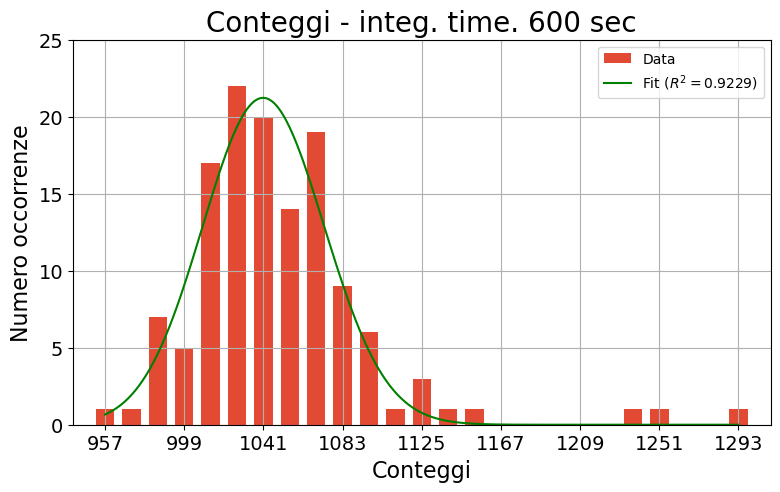

In [15]:
# Lettura dei dati
# In questa cella si leggono i dati relativi ai conteggi
data = pd.read_csv("data/counts_poisson.csv", delimiter=";")
counts_poisson = data["counts"].to_numpy()

# Plot - istogramma e fit
fig, ax = plt.subplots(1, 1, figsize=[9,5])

ax.set_title('Conteggi - integ. time. 600 sec', size=titlefontsize)
occs, values, patches = ax.hist(counts_poisson, bins=25, range=(950, 1300), rwidth=0.7, label='Data', color='#E24A33')
# Serve per ottenere i valori medi dei canali, che saranno usati con il numero di occorrenze "occs" per fare il fit
middle_counts = (values[1:] + values[:-1])/2


# Si effettua ora il fit non lineare per i parametri lambda e A
popt, pcov = sop.curve_fit(my_poiss, middle_counts, occs, p0=[1000, 1000])
lambda_ = popt[0]
A = popt[1]

# Si calcola la deviazione standard e l'R^2
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(occs, my_poiss(middle_counts, lambda_, A))

print('Valore fittato per lambda=', "{:.0f}".format(lambda_), 'deviazione standard=',"{:.0f}".format(sigma[0]))
print('Valore fittato per A=', "{:.0f}".format(A), 'deviazione standard=',"{:.0f}".format(sigma[1]))
print("R^2 = ", "{:.5g}".format(r_sq))

n_fit = np.int_(np.linspace(middle_counts[0], middle_counts[-1], 1000))
ax.plot(n_fit, my_poiss(n_fit, lambda_, A), '-', color='green', label="Fit ($R^2=${:.4f})".format(r_sq))

ax.set_xticks(middle_counts[::3], np.int_(middle_counts[::3]))
ax.set_xlim(940,1310)
ax.set_ylim(0,25)
ax.set_xlabel("Conteggi", fontsize=labelfontsize)
ax.set_ylabel("Numero occorrenze", fontsize=labelfontsize)
ax.grid(True)
ax.tick_params(labelsize=tickfontsize)
ax.legend();

Nonostante la grande rumorosità delle misure (che, come riportato nel titolo del plot, sono state effettuate con un tempo di integrazione di 600 secondi) l'andamento approssima quello di una distribuzione poissoniana. Il valore medio trovato risulta $\lambda = 1041 \pm 11$, che è più o meno ciò che ci si aspettava di trovare anche in relazione all'istogramma rappresentato sopra. Notare che la deviazione standard riportata in questo valore non è la deviazione standard della poissoniana, ma l'incertezza con cui la procedura di fit determina il parametro.

NOTA: per effettuare il fit si è utilizzata la funzione `scipy.stats.poisson`, che rappresenta una poissoniana standard, per questo motivo si ottiene un fattore di normalizzazione $A$ molto grande.